# Manual Implementation of Linear Regression

In [231]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
X = np.arange(1.0, 51.0)
np.random.seed(42)
noise = np.random.normal(0, 4.0, 50)
y = 2.5 * X + noise

## Linear Regression Equation

\begin{equation}
\hat{y} = b + w_1 x_1 + w_2 x_2 + \dots + w_n x_n
\end{equation}


In [233]:
def predict(b, w, x=X):
    y_hat = b + np.dot(w, x)
    return y_hat


y_pred = predict(0, 0)
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


## Error

\begin{equation}
error = y - \hat{y}
\end{equation}

In [234]:
error = y - y_pred
print(f"Error: {error}")

Error: [  4.48685661   4.4469428   10.09075415  16.09211943  11.5633865
  14.06345217  23.81685126  23.06973892  20.62210246  27.17024017
  25.64632923  28.13708099  33.46784909  27.34687902  30.60032867
  37.75084988  38.44867552  46.25698933  43.8679037   44.35078519
  58.36259508  54.0968948   57.77011282  54.30100726  60.3224691
  65.44369036  62.89602569  71.50279207  70.09744524  73.833225
  75.09317355  87.40911274  82.4460111   80.76915628  90.79017965
  85.1166254   93.33545438  87.1613195   92.1872558  100.78744494
 105.45386632 105.68547312 107.03740687 108.79558522 106.58591204
 112.12062317 115.65744492 124.2284889  123.87447316 117.94783938]


## Mean Squared Error

\begin{equation}
\frac{1}{N} \sum (y - \hat{y})^2
\end{equation}

In [235]:
def display_mse(y_pred):
    error = y - y_pred
    mse = (1 / len(X)) * np.sum(np.square(error))
    print(f"Mean Squared Error (MSE): {mse}")


display_mse(y_pred)

Mean Squared Error (MSE): 5215.829676804588


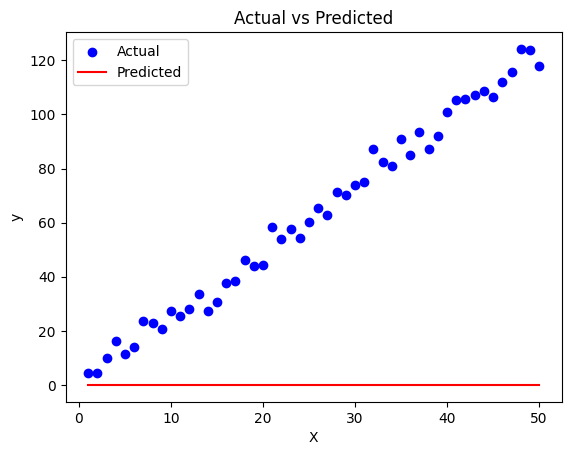

In [236]:
def create_scatter_plot(y_pred):
    plt.scatter(X, y, label="Actual", color="blue")
    plt.plot(X, y_pred, label="Predicted", color="red")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Actual vs Predicted")
    plt.legend()
    plt.show()


create_scatter_plot(y_pred)

## Find the optimal values for $w$ and $b$

Without gradient descent, you have to experiment with different values of w and b

\begin{align}
\hat{y} &= w \cdot x + b \\
\frac{1}{m} &\sum_{i=1}^{m} (\hat{y} - y^{(i)})^2 \\
dw &= \frac{1}{m} \sum (\hat{y} - y) \cdot 2x \\
db &= \frac{1}{m} \sum (\hat{y} - y) \cdot 2 \\
w &\mathrel{-}= \alpha \cdot dw \\
b &\mathrel{-}= \alpha \cdot db
\end{align}



In [237]:
def compute_gradient(x, y, w, b):
    m = len(x)
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        y_pred = predict(b, w, x[i])
        error = y_pred - y[i]
        dj_dw += error * 2 * x[i]
        dj_db += error * 2

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db


compute_gradient(X, y, 0, 0)

(np.float64(-4226.788967500527), np.float64(-125.69620875795084))

In [238]:
import matplotlib.pyplot as plt


def gradient_descent(x, y, w_init, b_init, alpha, iterations):
    w = w_init
    b = b_init
    loss_history = []

    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        y_pred = w * x + b
        error = y - y_pred
        mse = (1 / len(X)) * np.sum(np.square(error))
        loss_history.append(mse)

        if i % 100 == 0 or i == iterations - 1:
            print(f"Iteration {i}: w = {w:.4f}, b = {b:.4f}, MSE = {mse:.4f}")

    plt.plot(loss_history, "r")
    plt.xlabel("Iteration")
    plt.ylabel("MSE Loss")
    plt.yticks(rotation=0)
    plt.title("Loss Curve")
    plt.show()

    return w, b

Iteration 0: w = 4.2268, b = 0.1257, MSE = 2699.1389
Iteration 100: w = 2.4592, b = 0.0842, MSE = 13.2141
Iteration 200: w = 2.4589, b = 0.0946, MSE = 13.2130
Iteration 300: w = 2.4586, b = 0.1046, MSE = 13.2120
Iteration 400: w = 2.4583, b = 0.1141, MSE = 13.2111
Iteration 499: w = 2.4581, b = 0.1230, MSE = 13.2103


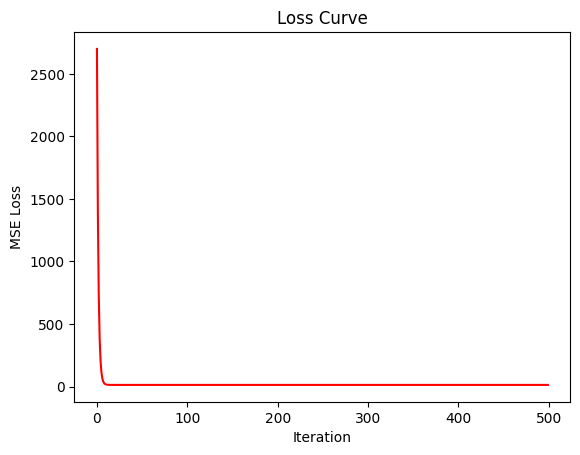

In [239]:
w_final, b_final = gradient_descent(
    X, y, w_init=0, b_init=0, alpha=0.001, iterations=500
)

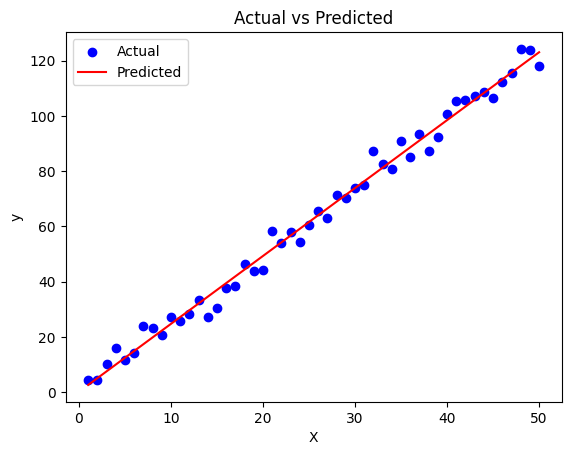

In [240]:
y_pred = predict(b_final, w_final)
create_scatter_plot(y_pred)

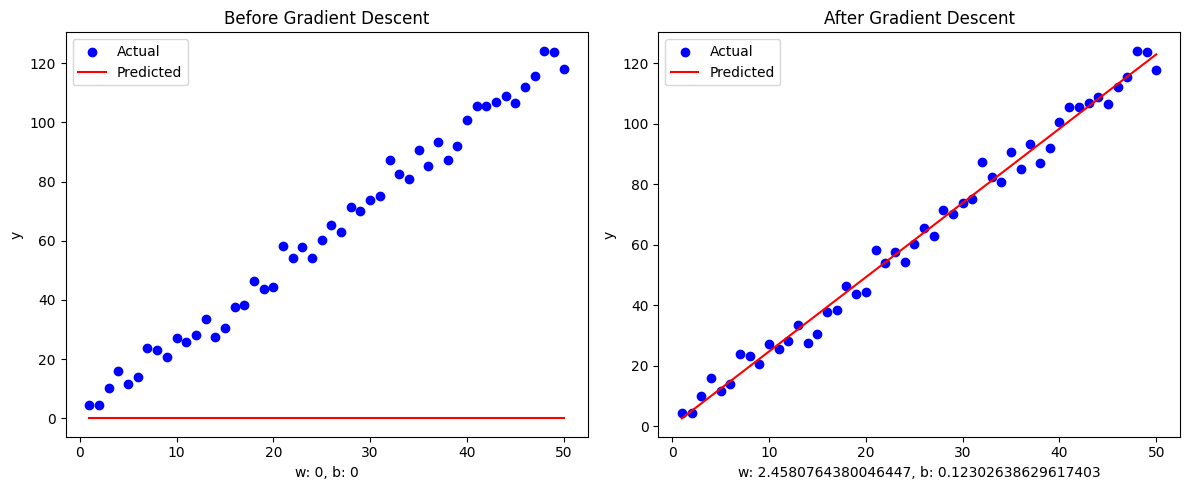

MSE Before Gradient Descent:
Mean Squared Error (MSE): 5215.829676804588

MSE After Gradient Descent:
Mean Squared Error (MSE): 13.210310763134526


In [241]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
before_gradient_descent = predict(0, 0)
after_gradient_descent = predict(b_final, w_final)


ax[0].scatter(X, y, label="Actual", color="blue")
ax[0].plot(X, before_gradient_descent, label="Predicted", color="red")
ax[0].set_xlabel("w: 0, b: 0")
ax[0].set_ylabel("y")
ax[0].set_title("Before Gradient Descent")
ax[0].legend()

ax[1].scatter(X, y, label="Actual", color="blue")
ax[1].plot(X, after_gradient_descent, label="Predicted", color="red")
ax[1].set_xlabel(f"w: {w_final}, b: {b_final}")
ax[1].set_ylabel("y")
ax[1].set_title("After Gradient Descent")
ax[1].legend()

plt.tight_layout()
plt.show()

print("MSE Before Gradient Descent:")
display_mse(before_gradient_descent)
print("\nMSE After Gradient Descent:")
display_mse(after_gradient_descent)